In [145]:
# Import data manipulation libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import calendar
from datetime import datetime
pd.set_option('display.max_columns', None)

from plotly.subplots import make_subplots
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [146]:
# load the cleaned clustered data

df = pd.read_csv("cleaned_fulldf_withclusters.csv")

In [147]:
df.head()


,ID,Set,District,Block,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,TransIrriCost_per_Acre,StandingWater,Ganaura,Ganaura_per_Acre,CropOrgFYM,CropOrgFYM_per_Acre,PCropSolidOrgFertAppMethod,NoFertilizerAppln,BasalDAP,BasalDAP_per_Acre,BasalUrea,BasalUrea_per_Acre,MineralFertAppMethod,1tdUrea,1tdUrea_per_Acre,1appDaysUrea,2tdUrea,2tdUrea_per_Acre,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Harv_hand_rent_per_Acre,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield,Yield_per_Acre,LandPrepMethod_TractorPlough,LandPrepMethod_FourWheelTracRotavator,LandPrepMethod_WetTillagePuddling,LandPrepMethod_BullockPlough,LandPrepMethod_Other,NursDetFactor_CalendarDate,NursDetFactor_PreMonsoonShowers,NursDetFactor_IrrigWaterAvailability,NursDetFactor_LabourAvailability,NursDetFactor_SeedAvailability,TransDetFactor_LabourAvailability,TransDetFactor_CalendarDate,TransDetFactor_RainArrival,TransDetFactor_IrrigWaterAvailability,TransDetFactor_SeedlingAge,CropbasalFerts_Urea,CropbasalFerts_DAP,CropbasalFerts_Other,CropbasalFerts_NPK,CropbasalFerts_MoP,CropbasalFerts_NPKS,CropbasalFerts_SSP,CropbasalFerts_None,FirstTopDressFert_Urea,FirstTopDressFert_DAP,FirstTopDressFert_NPK,FirstTopDressFert_NPKS,FirstTopDressFert_SSP,FirstTopDressFert_Other,OrgFertilizers_Ganaura,OrgFertilizers_FYM,OrgFertilizers_VermiCompost,OrgFertilizers_Pranamrit,OrgFertilizers_Ghanajeevamrit,OrgFertilizers_Jeevamrit,OrgFertilizers_PoultryManure,Nb_of_NaN,k2label,k3label,k4label,k5label
0,ID_GTFAC7PEVWQ9,train,Nalanda,Noorsarai,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.0,5.0,Boring,Electric,200.0,640.0,2.0,0.0,NaN,0.0,NaN,NaN,2,0.0,NaN,20.0,64.0,Broadcasting,15.0,48.00,18.0,0.0,NaN,NaN,Broadcasting,machine,2022-11-16,0.0,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600.0,1920.000000,True,True,False,False,False,True,False,True,False,True,False,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,7,A,A,A,B
1,ID_TK40ARLSPOKS,train,Nalanda,Rajgir,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.0,5.0,Boring,Electric,125.0,400.0,3.0,0.0,NaN,0.0,NaN,NaN,2,15.0,48.0,10.0,32.0,Broadcasting,20.0,64.00,39.0,0.0,NaN,NaN,Broadcasting,hand,2022-11-25,3.0,9.6,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600.0,1920.000000,True,True,True,False,False,True,True,True,True,True,False,True,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,5,A,A,A,B
2,ID_1FJY2CRIMLZZ,train,Gaya,Gurua,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.0,4.0,Boring,Electric,80.0,540.0,2.0,1.0,6.75,1.0,6.75,SoilApplied,2,4.0,27.0,0.0,NaN,SoilApplied,5.0,33.75,65.0,0.0,NaN,NaN,RootApplication,hand,2022-12-12,480.0,3240.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225.0,1518.750000,True,True,False,False,False,False,True,True,True,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,3,A,A,A,A
3,ID_I3IPXS4DB7NE,train,Gaya,Gurua,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.50,0.0,NaN,SoilApplied,2,6.0,27.0,3.0,13.5,Broadcasting,5.0,22.50,5.0,0.0,NaN,NaN,Broadcasting,hand,2022-12-02,240.0,1080.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468.0,2106.000000,True,True,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,9,A,A,A,A
4,ID_4T8YQWXWHB4A,train,Nalanda,Noorsarai,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.0,9.0,Boring,Electric,300.0,640.0,2.0,0.0,NaN,0.0,NaN,NaN,2,15.0,32.0,

In [148]:
# view 10 complete rows of the data of which we view all columns
pd.set_option('display.max_columns', None)
df.head(10)


,ID,Set,District,Block,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,TransIrriCost_per_Acre,StandingWater,Ganaura,Ganaura_per_Acre,CropOrgFYM,CropOrgFYM_per_Acre,PCropSolidOrgFertAppMethod,NoFertilizerAppln,BasalDAP,BasalDAP_per_Acre,BasalUrea,BasalUrea_per_Acre,MineralFertAppMethod,1tdUrea,1tdUrea_per_Acre,1appDaysUrea,2tdUrea,2tdUrea_per_Acre,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Harv_hand_rent_per_Acre,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield,Yield_per_Acre,LandPrepMethod_TractorPlough,LandPrepMethod_FourWheelTracRotavator,LandPrepMethod_WetTillagePuddling,LandPrepMethod_BullockPlough,LandPrepMethod_Other,NursDetFactor_CalendarDate,NursDetFactor_PreMonsoonShowers,NursDetFactor_IrrigWaterAvailability,NursDetFactor_LabourAvailability,NursDetFactor_SeedAvailability,TransDetFactor_LabourAvailability,TransDetFactor_CalendarDate,TransDetFactor_RainArrival,TransDetFactor_IrrigWaterAvailability,TransDetFactor_SeedlingAge,CropbasalFerts_Urea,CropbasalFerts_DAP,CropbasalFerts_Other,CropbasalFerts_NPK,CropbasalFerts_MoP,CropbasalFerts_NPKS,CropbasalFerts_SSP,CropbasalFerts_None,FirstTopDressFert_Urea,FirstTopDressFert_DAP,FirstTopDressFert_NPK,FirstTopDressFert_NPKS,FirstTopDressFert_SSP,FirstTopDressFert_Other,OrgFertilizers_Ganaura,OrgFertilizers_FYM,OrgFertilizers_VermiCompost,OrgFertilizers_Pranamrit,OrgFertilizers_Ghanajeevamrit,OrgFertilizers_Jeevamrit,OrgFertilizers_PoultryManure,Nb_of_NaN,k2label,k3label,k4label,k5label
0,ID_GTFAC7PEVWQ9,train,Nalanda,Noorsarai,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.0,5.0,Boring,Electric,200.0,640.0,2.0,0.0,NaN,0.0,NaN,NaN,2,0.0,NaN,20.0,64.0,Broadcasting,15.0,48.000000,18.0,0.0,NaN,NaN,Broadcasting,machine,2022-11-16,0.0,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600.0,1920.000000,True,True,False,False,False,True,False,True,False,True,False,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,7,A,A,A,B
1,ID_TK40ARLSPOKS,train,Nalanda,Rajgir,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.0,5.0,Boring,Electric,125.0,400.0,3.0,0.0,NaN,0.0,NaN,NaN,2,15.0,48.0,10.0,32.0,Broadcasting,20.0,64.000000,39.0,0.0,NaN,NaN,Broadcasting,hand,2022-11-25,3.0,9.600000,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600.0,1920.000000,True,True,True,False,False,True,True,True,True,True,False,True,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,5,A,A,A,B
2,ID_1FJY2CRIMLZZ,train,Gaya,Gurua,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.0,4.0,Boring,Electric,80.0,540.0,2.0,1.0,6.750000,1.0,6.750000,SoilApplied,2,4.0,27.0,0.0,NaN,SoilApplied,5.0,33.750000,65.0,0.0,NaN,NaN,RootApplication,hand,2022-12-12,480.0,3240.000000,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225.0,1518.750000,True,True,False,False,False,False,True,True,True,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,3,A,A,A,A
3,ID_I3IPXS4DB7NE,train,Gaya,Gurua,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.500000,0.0,NaN,SoilApplied,2,6.0,27.0,3.0,13.5,Broadcasting,5.0,22.500000,5.0,0.0,NaN,NaN,Broadcasting,hand,2022-12-02,240.0,1080.000000,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468.0,2106.000000,True,True,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,9,A,A,A,A
4,ID_4T8YQWXWHB4A,train,Nalanda,Noorsarai,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.0,9.0,Boring,Electric,300.0

In [149]:
df.loc[df['k3label'] == "A"].head(10)


,ID,Set,District,Block,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,TransIrriCost_per_Acre,StandingWater,Ganaura,Ganaura_per_Acre,CropOrgFYM,CropOrgFYM_per_Acre,PCropSolidOrgFertAppMethod,NoFertilizerAppln,BasalDAP,BasalDAP_per_Acre,BasalUrea,BasalUrea_per_Acre,MineralFertAppMethod,1tdUrea,1tdUrea_per_Acre,1appDaysUrea,2tdUrea,2tdUrea_per_Acre,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Harv_hand_rent_per_Acre,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield,Yield_per_Acre,LandPrepMethod_TractorPlough,LandPrepMethod_FourWheelTracRotavator,LandPrepMethod_WetTillagePuddling,LandPrepMethod_BullockPlough,LandPrepMethod_Other,NursDetFactor_CalendarDate,NursDetFactor_PreMonsoonShowers,NursDetFactor_IrrigWaterAvailability,NursDetFactor_LabourAvailability,NursDetFactor_SeedAvailability,TransDetFactor_LabourAvailability,TransDetFactor_CalendarDate,TransDetFactor_RainArrival,TransDetFactor_IrrigWaterAvailability,TransDetFactor_SeedlingAge,CropbasalFerts_Urea,CropbasalFerts_DAP,CropbasalFerts_Other,CropbasalFerts_NPK,CropbasalFerts_MoP,CropbasalFerts_NPKS,CropbasalFerts_SSP,CropbasalFerts_None,FirstTopDressFert_Urea,FirstTopDressFert_DAP,FirstTopDressFert_NPK,FirstTopDressFert_NPKS,FirstTopDressFert_SSP,FirstTopDressFert_Other,OrgFertilizers_Ganaura,OrgFertilizers_FYM,OrgFertilizers_VermiCompost,OrgFertilizers_Pranamrit,OrgFertilizers_Ghanajeevamrit,OrgFertilizers_Jeevamrit,OrgFertilizers_PoultryManure,Nb_of_NaN,k2label,k3label,k4label,k5label
0,ID_GTFAC7PEVWQ9,train,Nalanda,Noorsarai,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.0,5.0,Boring,Electric,200.0,640.0,2.0,0.0,NaN,0.0,NaN,NaN,2,0.0,NaN,20.0,64.0,Broadcasting,15.0,48.000000,18.0,0.0,NaN,NaN,Broadcasting,machine,2022-11-16,0.0,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600.0,1920.000000,True,True,False,False,False,True,False,True,False,True,False,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,7,A,A,A,B
1,ID_TK40ARLSPOKS,train,Nalanda,Rajgir,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.0,5.0,Boring,Electric,125.0,400.0,3.0,0.0,NaN,0.0,NaN,NaN,2,15.0,48.0,10.0,32.0,Broadcasting,20.0,64.000000,39.0,0.0,NaN,NaN,Broadcasting,hand,2022-11-25,3.0,9.600000,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600.0,1920.000000,True,True,True,False,False,True,True,True,True,True,False,True,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,5,A,A,A,B
2,ID_1FJY2CRIMLZZ,train,Gaya,Gurua,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.0,4.0,Boring,Electric,80.0,540.0,2.0,1.0,6.750000,1.0,6.750000,SoilApplied,2,4.0,27.0,0.0,NaN,SoilApplied,5.0,33.750000,65.0,0.0,NaN,NaN,RootApplication,hand,2022-12-12,480.0,3240.000000,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225.0,1518.750000,True,True,False,False,False,False,True,True,True,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,3,A,A,A,A
3,ID_I3IPXS4DB7NE,train,Gaya,Gurua,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.500000,0.0,NaN,SoilApplied,2,6.0,27.0,3.0,13.5,Broadcasting,5.0,22.500000,5.0,0.0,NaN,NaN,Broadcasting,hand,2022-12-02,240.0,1080.000000,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468.0,2106.000000,True,True,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,9,A,A,A,A
4,ID_4T8YQWXWHB4A,train,Nalanda,Noorsarai,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.0,9.0,Boring,Electric,300.0

In [150]:
# Drop the columns ID and Set
# Makes it muddled I just want to see the actual districts

df_no_id = df.drop(['ID', 'Set'], axis=1)


In [151]:
df_no_id.head()

,District,Block,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,TransIrriCost_per_Acre,StandingWater,Ganaura,Ganaura_per_Acre,CropOrgFYM,CropOrgFYM_per_Acre,PCropSolidOrgFertAppMethod,NoFertilizerAppln,BasalDAP,BasalDAP_per_Acre,BasalUrea,BasalUrea_per_Acre,MineralFertAppMethod,1tdUrea,1tdUrea_per_Acre,1appDaysUrea,2tdUrea,2tdUrea_per_Acre,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Harv_hand_rent_per_Acre,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield,Yield_per_Acre,LandPrepMethod_TractorPlough,LandPrepMethod_FourWheelTracRotavator,LandPrepMethod_WetTillagePuddling,LandPrepMethod_BullockPlough,LandPrepMethod_Other,NursDetFactor_CalendarDate,NursDetFactor_PreMonsoonShowers,NursDetFactor_IrrigWaterAvailability,NursDetFactor_LabourAvailability,NursDetFactor_SeedAvailability,TransDetFactor_LabourAvailability,TransDetFactor_CalendarDate,TransDetFactor_RainArrival,TransDetFactor_IrrigWaterAvailability,TransDetFactor_SeedlingAge,CropbasalFerts_Urea,CropbasalFerts_DAP,CropbasalFerts_Other,CropbasalFerts_NPK,CropbasalFerts_MoP,CropbasalFerts_NPKS,CropbasalFerts_SSP,CropbasalFerts_None,FirstTopDressFert_Urea,FirstTopDressFert_DAP,FirstTopDressFert_NPK,FirstTopDressFert_NPKS,FirstTopDressFert_SSP,FirstTopDressFert_Other,OrgFertilizers_Ganaura,OrgFertilizers_FYM,OrgFertilizers_VermiCompost,OrgFertilizers_Pranamrit,OrgFertilizers_Ghanajeevamrit,OrgFertilizers_Jeevamrit,OrgFertilizers_PoultryManure,Nb_of_NaN,k2label,k3label,k4label,k5label
0,Nalanda,Noorsarai,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.0,5.0,Boring,Electric,200.0,640.0,2.0,0.0,NaN,0.0,NaN,NaN,2,0.0,NaN,20.0,64.0,Broadcasting,15.0,48.00,18.0,0.0,NaN,NaN,Broadcasting,machine,2022-11-16,0.0,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600.0,1920.000000,True,True,False,False,False,True,False,True,False,True,False,True,True,True,True,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,7,A,A,A,B
1,Nalanda,Rajgir,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.0,5.0,Boring,Electric,125.0,400.0,3.0,0.0,NaN,0.0,NaN,NaN,2,15.0,48.0,10.0,32.0,Broadcasting,20.0,64.00,39.0,0.0,NaN,NaN,Broadcasting,hand,2022-11-25,3.0,9.6,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600.0,1920.000000,True,True,True,False,False,True,True,True,True,True,False,True,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,5,A,A,A,B
2,Gaya,Gurua,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.0,4.0,Boring,Electric,80.0,540.0,2.0,1.0,6.75,1.0,6.75,SoilApplied,2,4.0,27.0,0.0,NaN,SoilApplied,5.0,33.75,65.0,0.0,NaN,NaN,RootApplication,hand,2022-12-12,480.0,3240.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225.0,1518.750000,True,True,False,False,False,False,True,True,True,False,False,False,False,True,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,3,A,A,A,A
3,Gaya,Gurua,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.50,0.0,NaN,SoilApplied,2,6.0,27.0,3.0,13.5,Broadcasting,5.0,22.50,5.0,0.0,NaN,NaN,Broadcasting,hand,2022-12-02,240.0,1080.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468.0,2106.000000,True,True,False,False,False,True,True,True,True,True,False,True,True,True,True,True,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,9,A,A,A,A
4,Nalanda,Noorsarai,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.0,9.0,Boring,Electric,300.0,640.0,2.0,0.0,NaN,0.0,NaN,NaN,2,15.0,32.0,30.0,64.0,Broadcasting,30.0,64.00,26.0,0.0,NaN,NaN,Broadcasting,machine,2022-11-30,0.0,NaN,2022-12-02,machine,24,40,p

### Identify the different labels of K clustering and split them up into seperate dataframes so I can analyse them individually

In [152]:
print(df_no_id['k3label'].value_counts())

k3label
A    3907
B    1004
C     249
Name: count, dtype: int64


### Diagrams from Jullietes Code

In [153]:
fig = px.box(df_no_id, x="CropTillageDepth", color="k3label", width=600, height=400)
fig.show()

fig = px.box(df_no_id, x="SeedlingsPerPit", color="k3label", width=600, height=400)
fig.show()

fig = px.histogram(df_no_id, x="TransplantingIrrigationSource", color="k3label", width=600, height=400)
fig.show()

#fig = px.histogram(df2, x="OrgFertilizers", color="k3label", width=600, height=400)
#fig.show()

fig = px.box(df_no_id, x="CropOrgFYM_per_Acre", color="k3label", width=600, height=400)
fig.show()

fig = px.histogram(df_no_id, x="Harv_method", facet_col="k3label", width=600, height=400)
fig.show()

fig = px.histogram(df_no_id, x="Threshing_method", facet_col="k3label", width=600, height=400)
fig.show()

fig = px.histogram(df_no_id, x="District", facet_col="k3label", width=800, height=400)
fig.show()

fig = px.histogram(df_no_id, x="Block", facet_col="k3label", width=900, height=400)
fig.show()

fig = px.box(df_no_id, x="Yield_per_Acre", color="k3label", width=900, height=400)
fig.show()

fig = px.box(df_no_id, x="Yield_per_Acre", color="k2label", width=900, height=400)
fig.show()

## Attempt to figure out the factors that are primarily responsible for the clustering

In [154]:
df_no_id.dtypes.value_counts()

bool       36
float64    24
object     20
int64       5
Name: count, dtype: int64

In [155]:
# List all the object type columns 
obj_cols = df_no_id.select_dtypes(include=['object']).columns.tolist()
obj_cols

['District',
 'Block',
 'CropTillageDate',
 'CropEstMethod',
 'RcNursEstDate',
 'SeedingSowingTransplanting',
 'TransplantingIrrigationSource',
 'TransplantingIrrigationPowerSource',
 'PCropSolidOrgFertAppMethod',
 'MineralFertAppMethod',
 'MineralFertAppMethod.1',
 'Harv_method',
 'Harv_date',
 'Threshing_date',
 'Threshing_method',
 'Stubble_use',
 'k2label',
 'k3label',
 'k4label',
 'k5label']

*I'm going to leave this out for now, but I will definently return to the object types*

In [156]:
# List all the bool type columns 
bool_cols = df_no_id.select_dtypes(include=['bool']).columns.tolist()
bool_cols

['LandPrepMethod_TractorPlough',
 'LandPrepMethod_FourWheelTracRotavator',
 'LandPrepMethod_WetTillagePuddling',
 'LandPrepMethod_BullockPlough',
 'LandPrepMethod_Other',
 'NursDetFactor_CalendarDate',
 'NursDetFactor_PreMonsoonShowers',
 'NursDetFactor_IrrigWaterAvailability',
 'NursDetFactor_LabourAvailability',
 'NursDetFactor_SeedAvailability',
 'TransDetFactor_LabourAvailability',
 'TransDetFactor_CalendarDate',
 'TransDetFactor_RainArrival',
 'TransDetFactor_IrrigWaterAvailability',
 'TransDetFactor_SeedlingAge',
 'CropbasalFerts_Urea',
 'CropbasalFerts_DAP',
 'CropbasalFerts_Other',
 'CropbasalFerts_NPK',
 'CropbasalFerts_MoP',
 'CropbasalFerts_NPKS',
 'CropbasalFerts_SSP',
 'CropbasalFerts_None',
 'FirstTopDressFert_Urea',
 'FirstTopDressFert_DAP',
 'FirstTopDressFert_NPK',
 'FirstTopDressFert_NPKS',
 'FirstTopDressFert_SSP',
 'FirstTopDressFert_Other',
 'OrgFertilizers_Ganaura',
 'OrgFertilizers_FYM',
 'OrgFertilizers_VermiCompost',
 'OrgFertilizers_Pranamrit',
 'OrgFertilizer

In [157]:
# List all the float and int type columns 

float_cols = df_no_id.select_dtypes(include=['float64', 'int64']).columns.tolist()
float_cols

['CropTillageDepth',
 'SeedlingsPerPit',
 'TransplantingIrrigationHours',
 'TransIrriCost',
 'TransIrriCost_per_Acre',
 'StandingWater',
 'Ganaura',
 'Ganaura_per_Acre',
 'CropOrgFYM',
 'CropOrgFYM_per_Acre',
 'NoFertilizerAppln',
 'BasalDAP',
 'BasalDAP_per_Acre',
 'BasalUrea',
 'BasalUrea_per_Acre',
 '1tdUrea',
 '1tdUrea_per_Acre',
 '1appDaysUrea',
 '2tdUrea',
 '2tdUrea_per_Acre',
 '2appDaysUrea',
 'Harv_hand_rent',
 'Harv_hand_rent_per_Acre',
 'Residue_length',
 'Residue_perc',
 'Acre',
 'Yield',
 'Yield_per_Acre',
 'Nb_of_NaN']

In [158]:
kmeans_mean_numerical = df_no_id.groupby('k3label')[float_cols].mean()

In [159]:
for column in bool_cols:
    df_no_id[column] = df_no_id[column].astype(int)

In [160]:
kmeans_means_boolen = df_no_id.groupby('k3label')[bool_cols].mean()

In [161]:
kmeans_mean_numerical

,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,TransIrriCost_per_Acre,StandingWater,Ganaura,Ganaura_per_Acre,CropOrgFYM,CropOrgFYM_per_Acre,NoFertilizerAppln,BasalDAP,BasalDAP_per_Acre,BasalUrea,BasalUrea_per_Acre,1tdUrea,1tdUrea_per_Acre,1appDaysUrea,2tdUrea,2tdUrea_per_Acre,2appDaysUrea,Harv_hand_rent,Harv_hand_rent_per_Acre,Residue_length,Residue_perc,Acre,Yield,Yield_per_Acre,Nb_of_NaN
k3label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,4.652675,1.937216,8.143680,327.047783,1439.001094,3.197074,3.862298,59.908211,25.837983,94.336095,2.305349,10.595598,42.984777,6.488098,43.774905,11.713847,45.300832,30.426132,2.937292,36.572582,58.731509,564.053494,2419.838648,26.473253,12.157666,0.294597,585.688033,1943.383560,4.897108
B,3.900398,4.546000,8.018109,483.415744,1900.659929,3.483573,41.127490,430.818089,0.141434,7.824561,1.573705,9.669323,47.236538,13.000996,52.144910,5.113546,41.882657,18.436475,0.018924,41.800000,37.500000,465.620518,1742.394352,25.920319,10.418327,0.280413,629.620053,2135.675323,6.134462
C,4.000000,3.995968,7.799197,771.163180,2213.727755,3.154472,3.305221,11.567399,0.016064,11.000000,2.899598,0.000000,NaN,0.000000,NaN,2.100402,6.608112,27.771084,1.164659,3.893658,59.491071,89.518072,288.154188,28.811245,10.000000,0.351771,585.178771,1652.861639,3.678715


In [162]:
kmeans_means_boolen

,LandPrepMethod_TractorPlough,LandPrepMethod_FourWheelTracRotavator,LandPrepMethod_WetTillagePuddling,LandPrepMethod_BullockPlough,LandPrepMethod_Other,NursDetFactor_CalendarDate,NursDetFactor_PreMonsoonShowers,NursDetFactor_IrrigWaterAvailability,NursDetFactor_LabourAvailability,NursDetFactor_SeedAvailability,TransDetFactor_LabourAvailability,TransDetFactor_CalendarDate,TransDetFactor_RainArrival,TransDetFactor_IrrigWaterAvailability,TransDetFactor_SeedlingAge,CropbasalFerts_Urea,CropbasalFerts_DAP,CropbasalFerts_Other,CropbasalFerts_NPK,CropbasalFerts_MoP,CropbasalFerts_NPKS,CropbasalFerts_SSP,CropbasalFerts_None,FirstTopDressFert_Urea,FirstTopDressFert_DAP,FirstTopDressFert_NPK,FirstTopDressFert_NPKS,FirstTopDressFert_SSP,FirstTopDressFert_Other,OrgFertilizers_Ganaura,OrgFertilizers_FYM,OrgFertilizers_VermiCompost,OrgFertilizers_Pranamrit,OrgFertilizers_Ghanajeevamrit,OrgFertilizers_Jeevamrit,OrgFertilizers_PoultryManure
k3label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,0.882519,0.729204,0.394420,0.038649,0.004607,0.627336,0.386998,0.711287,0.466087,0.561812,0.0,0.635526,0.610187,0.802918,0.722293,0.495009,0.914768,0.024571,0.027131,0.001024,0.014589,0.024059,0.003839,0.944203,0.106732,0.008446,0.006399,0.001024,0.000256,0.333504,0.394676,0.018684,0.001792,0.018684,0.000768,0.001536
B,0.987052,0.046813,0.373506,0.350598,0.002988,0.521912,0.347610,0.597610,0.122510,0.313745,0.0,0.488048,0.564741,0.375498,0.561753,0.986056,0.848606,0.000000,0.001992,0.000996,0.000996,0.000996,0.000000,0.487052,0.103586,0.000000,0.000000,0.000000,0.000000,0.456175,0.076693,0.000000,0.000000,0.000000,0.000000,0.000996
C,1.000000,0.004016,0.000000,1.000000,0.000000,0.995984,0.000000,0.939759,0.000000,0.000000,0.0,0.987952,0.204819,0.000000,0.791165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.987952,0.000000,0.000000,0.000000,0.008032,0.811245,0.004016,0.000000,0.000000,0.000000,0.000000,0.000000


In [163]:
# Combine the two dataframes

kmeans_means = pd.concat([kmeans_mean_numerical, kmeans_means_boolen], axis=1)

kmeans_means

,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,TransIrriCost_per_Acre,StandingWater,Ganaura,Ganaura_per_Acre,CropOrgFYM,CropOrgFYM_per_Acre,NoFertilizerAppln,BasalDAP,BasalDAP_per_Acre,BasalUrea,BasalUrea_per_Acre,1tdUrea,1tdUrea_per_Acre,1appDaysUrea,2tdUrea,2tdUrea_per_Acre,2appDaysUrea,Harv_hand_rent,Harv_hand_rent_per_Acre,Residue_length,Residue_perc,Acre,Yield,Yield_per_Acre,Nb_of_NaN,LandPrepMethod_TractorPlough,LandPrepMethod_FourWheelTracRotavator,LandPrepMethod_WetTillagePuddling,LandPrepMethod_BullockPlough,LandPrepMethod_Other,NursDetFactor_CalendarDate,NursDetFactor_PreMonsoonShowers,NursDetFactor_IrrigWaterAvailability,NursDetFactor_LabourAvailability,NursDetFactor_SeedAvailability,TransDetFactor_LabourAvailability,TransDetFactor_CalendarDate,TransDetFactor_RainArrival,TransDetFactor_IrrigWaterAvailability,TransDetFactor_SeedlingAge,CropbasalFerts_Urea,CropbasalFerts_DAP,CropbasalFerts_Other,CropbasalFerts_NPK,CropbasalFerts_MoP,CropbasalFerts_NPKS,CropbasalFerts_SSP,CropbasalFerts_None,FirstTopDressFert_Urea,FirstTopDressFert_DAP,FirstTopDressFert_NPK,FirstTopDressFert_NPKS,FirstTopDressFert_SSP,FirstTopDressFert_Other,OrgFertilizers_Ganaura,OrgFertilizers_FYM,OrgFertilizers_VermiCompost,OrgFertilizers_Pranamrit,OrgFertilizers_Ghanajeevamrit,OrgFertilizers_Jeevamrit,OrgFertilizers_PoultryManure
k3label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,4.652675,1.937216,8.143680,327.047783,1439.001094,3.197074,3.862298,59.908211,25.837983,94.336095,2.305349,10.595598,42.984777,6.488098,43.774905,11.713847,45.300832,30.426132,2.937292,36.572582,58.731509,564.053494,2419.838648,26.473253,12.157666,0.294597,585.688033,1943.383560,4.897108,0.882519,0.729204,0.394420,0.038649,0.004607,0.627336,0.386998,0.711287,0.466087,0.561812,0.0,0.635526,0.610187,0.802918,0.722293,0.495009,0.914768,0.024571,0.027131,0.001024,0.014589,0.024059,0.003839,0.944203,0.106732,0.008446,0.006399,0.001024,0.000256,0.333504,0.394676,0.018684,0.001792,0.018684,0.000768,0.001536
B,3.900398,4.546000,8.018109,483.415744,1900.659929,3.483573,41.127490,430.818089,0.141434,7.824561,1.573705,9.669323,47.236538,13.000996,52.144910,5.113546,41.882657,18.436475,0.018924,41.800000,37.500000,465.620518,1742.394352,25.920319,10.418327,0.280413,629.620053,2135.675323,6.134462,0.987052,0.046813,0.373506,0.350598,0.002988,0.521912,0.347610,0.597610,0.122510,0.313745,0.0,0.488048,0.564741,0.375498,0.561753,0.986056,0.848606,0.000000,0.001992,0.000996,0.000996,0.000996,0.000000,0.487052,0.103586,0.000000,0.000000,0.000000,0.000000,0.456175,0.076693,0.000000,0.000000,0.000000,0.000000,0.000996
C,4.000000,3.995968,7.799197,771.163180,2213.727755,3.154472,3.305221,11.567399,0.016064,11.000000,2.899598,0.000000,NaN,0.000000,NaN,2.100402,6.608112,27.771084,1.164659,3.893658,59.491071,89.518072,288.154188,28.811245,10.000000,0.351771,585.178771,1652.861639,3.678715,1.000000,0.004016,0.000000,1.000000,0.000000,0.995984,0.000000,0.939759,0.000000,0.000000,0.0,0.987952,0.204819,0.000000,0.791165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.987952,0.000000,0.000000,0.000000,0.008032,0.811245,0.004016,0.000000,0.000000,0.000000,0.000000,0.000000


In [164]:
kmeans_means.head()

,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,TransIrriCost_per_Acre,StandingWater,Ganaura,Ganaura_per_Acre,CropOrgFYM,CropOrgFYM_per_Acre,NoFertilizerAppln,BasalDAP,BasalDAP_per_Acre,BasalUrea,BasalUrea_per_Acre,1tdUrea,1tdUrea_per_Acre,1appDaysUrea,2tdUrea,2tdUrea_per_Acre,2appDaysUrea,Harv_hand_rent,Harv_hand_rent_per_Acre,Residue_length,Residue_perc,Acre,Yield,Yield_per_Acre,Nb_of_NaN,LandPrepMethod_TractorPlough,LandPrepMethod_FourWheelTracRotavator,LandPrepMethod_WetTillagePuddling,LandPrepMethod_BullockPlough,LandPrepMethod_Other,NursDetFactor_CalendarDate,NursDetFactor_PreMonsoonShowers,NursDetFactor_IrrigWaterAvailability,NursDetFactor_LabourAvailability,NursDetFactor_SeedAvailability,TransDetFactor_LabourAvailability,TransDetFactor_CalendarDate,TransDetFactor_RainArrival,TransDetFactor_IrrigWaterAvailability,TransDetFactor_SeedlingAge,CropbasalFerts_Urea,CropbasalFerts_DAP,CropbasalFerts_Other,CropbasalFerts_NPK,CropbasalFerts_MoP,CropbasalFerts_NPKS,CropbasalFerts_SSP,CropbasalFerts_None,FirstTopDressFert_Urea,FirstTopDressFert_DAP,FirstTopDressFert_NPK,FirstTopDressFert_NPKS,FirstTopDressFert_SSP,FirstTopDressFert_Other,OrgFertilizers_Ganaura,OrgFertilizers_FYM,OrgFertilizers_VermiCompost,OrgFertilizers_Pranamrit,OrgFertilizers_Ghanajeevamrit,OrgFertilizers_Jeevamrit,OrgFertilizers_PoultryManure
k3label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,4.652675,1.937216,8.143680,327.047783,1439.001094,3.197074,3.862298,59.908211,25.837983,94.336095,2.305349,10.595598,42.984777,6.488098,43.774905,11.713847,45.300832,30.426132,2.937292,36.572582,58.731509,564.053494,2419.838648,26.473253,12.157666,0.294597,585.688033,1943.383560,4.897108,0.882519,0.729204,0.394420,0.038649,0.004607,0.627336,0.386998,0.711287,0.466087,0.561812,0.0,0.635526,0.610187,0.802918,0.722293,0.495009,0.914768,0.024571,0.027131,0.001024,0.014589,0.024059,0.003839,0.944203,0.106732,0.008446,0.006399,0.001024,0.000256,0.333504,0.394676,0.018684,0.001792,0.018684,0.000768,0.001536
B,3.900398,4.546000,8.018109,483.415744,1900.659929,3.483573,41.127490,430.818089,0.141434,7.824561,1.573705,9.669323,47.236538,13.000996,52.144910,5.113546,41.882657,18.436475,0.018924,41.800000,37.500000,465.620518,1742.394352,25.920319,10.418327,0.280413,629.620053,2135.675323,6.134462,0.987052,0.046813,0.373506,0.350598,0.002988,0.521912,0.347610,0.597610,0.122510,0.313745,0.0,0.488048,0.564741,0.375498,0.561753,0.986056,0.848606,0.000000,0.001992,0.000996,0.000996,0.000996,0.000000,0.487052,0.103586,0.000000,0.000000,0.000000,0.000000,0.456175,0.076693,0.000000,0.000000,0.000000,0.000000,0.000996
C,4.000000,3.995968,7.799197,771.163180,2213.727755,3.154472,3.305221,11.567399,0.016064,11.000000,2.899598,0.000000,NaN,0.000000,NaN,2.100402,6.608112,27.771084,1.164659,3.893658,59.491071,89.518072,288.154188,28.811245,10.000000,0.351771,585.178771,1652.861639,3.678715,1.000000,0.004016,0.000000,1.000000,0.000000,0.995984,0.000000,0.939759,0.000000,0.000000,0.0,0.987952,0.204819,0.000000,0.791165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.987952,0.000000,0.000000,0.000000,0.008032,0.811245,0.004016,0.000000,0.000000,0.000000,0.000000,0.000000


In [165]:
# I will be using a descion tree / tree based methods so for all intent and purposes I will NOT be scaling the data
# I might try scaling it later and seeing what it does but for now I will not be scaling the data

In [166]:
# Removing columns Julliete mentioned for the raw data

kmeans_means = kmeans_means.drop(["TransIrriCost_per_Acre","Ganaura_per_Acre","CropOrgFYM_per_Acre","BasalDAP_per_Acre","BasalUrea_per_Acre","1tdUrea_per_Acre",
                                  "2tdUrea_per_Acre","Harv_hand_rent_per_Acre","Yield_per_Acre"] ,axis=1)

In [167]:
X = kmeans_means
y = kmeans_means.index.tolist()

### Random Forest Classifier - We are using XGBoost but I wanted a quick model

In [168]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=123)

In [169]:
X

,CropTillageDepth,SeedlingsPerPit,TransplantingIrrigationHours,TransIrriCost,StandingWater,Ganaura,CropOrgFYM,NoFertilizerAppln,BasalDAP,BasalUrea,1tdUrea,1appDaysUrea,2tdUrea,2appDaysUrea,Harv_hand_rent,Residue_length,Residue_perc,Acre,Yield,Nb_of_NaN,LandPrepMethod_TractorPlough,LandPrepMethod_FourWheelTracRotavator,LandPrepMethod_WetTillagePuddling,LandPrepMethod_BullockPlough,LandPrepMethod_Other,NursDetFactor_CalendarDate,NursDetFactor_PreMonsoonShowers,NursDetFactor_IrrigWaterAvailability,NursDetFactor_LabourAvailability,NursDetFactor_SeedAvailability,TransDetFactor_LabourAvailability,TransDetFactor_CalendarDate,TransDetFactor_RainArrival,TransDetFactor_IrrigWaterAvailability,TransDetFactor_SeedlingAge,CropbasalFerts_Urea,CropbasalFerts_DAP,CropbasalFerts_Other,CropbasalFerts_NPK,CropbasalFerts_MoP,CropbasalFerts_NPKS,CropbasalFerts_SSP,CropbasalFerts_None,FirstTopDressFert_Urea,FirstTopDressFert_DAP,FirstTopDressFert_NPK,FirstTopDressFert_NPKS,FirstTopDressFert_SSP,FirstTopDressFert_Other,OrgFertilizers_Ganaura,OrgFertilizers_FYM,OrgFertilizers_VermiCompost,OrgFertilizers_Pranamrit,OrgFertilizers_Ghanajeevamrit,OrgFertilizers_Jeevamrit,OrgFertilizers_PoultryManure
k3label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A,4.652675,1.937216,8.143680,327.047783,3.197074,3.862298,25.837983,2.305349,10.595598,6.488098,11.713847,30.426132,2.937292,58.731509,564.053494,26.473253,12.157666,0.294597,585.688033,4.897108,0.882519,0.729204,0.394420,0.038649,0.004607,0.627336,0.386998,0.711287,0.466087,0.561812,0.0,0.635526,0.610187,0.802918,0.722293,0.495009,0.914768,0.024571,0.027131,0.001024,0.014589,0.024059,0.003839,0.944203,0.106732,0.008446,0.006399,0.001024,0.000256,0.333504,0.394676,0.018684,0.001792,0.018684,0.000768,0.001536
B,3.900398,4.546000,8.018109,483.415744,3.483573,41.127490,0.141434,1.573705,9.669323,13.000996,5.113546,18.436475,0.018924,37.500000,465.620518,25.920319,10.418327,0.280413,629.620053,6.134462,0.987052,0.046813,0.373506,0.350598,0.002988,0.521912,0.347610,0.597610,0.122510,0.313745,0.0,0.488048,0.564741,0.375498,0.561753,0.986056,0.848606,0.000000,0.001992,0.000996,0.000996,0.000996,0.000000,0.487052,0.103586,0.000000,0.000000,0.000000,0.000000,0.456175,0.076693,0.000000,0.000000,0.000000,0.000000,0.000996
C,4.000000,3.995968,7.799197,771.163180,3.154472,3.305221,0.016064,2.899598,0.000000,0.000000,2.100402,27.771084,1.164659,59.491071,89.518072,28.811245,10.000000,0.351771,585.178771,3.678715,1.000000,0.004016,0.000000,1.000000,0.000000,0.995984,0.000000,0.939759,0.000000,0.000000,0.0,0.987952,0.204819,0.000000,0.791165,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.987952,0.000000,0.000000,0.000000,0.008032,0.811245,0.004016,0.000000,0.000000,0.000000,0.000000,0.000000


In [170]:
y

['A', 'B', 'C']

In [171]:
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=123)

### Feature Importance and Analysis

In [172]:
feature_importances = pd.DataFrame(clf.feature_importances_, index=X.columns)

In [173]:
feature_importances

,0
CropTillageDepth,0.026316
SeedlingsPerPit,0.052632
TransplantingIrrigationHours,0.042105
TransIrriCost,0.021053
StandingWater,0.000000
Ganaura,0.026316
CropOrgFYM,0.000000
NoFertilizerAppln,0.005263
BasalDAP,0.000000
BasalUrea,0.015789


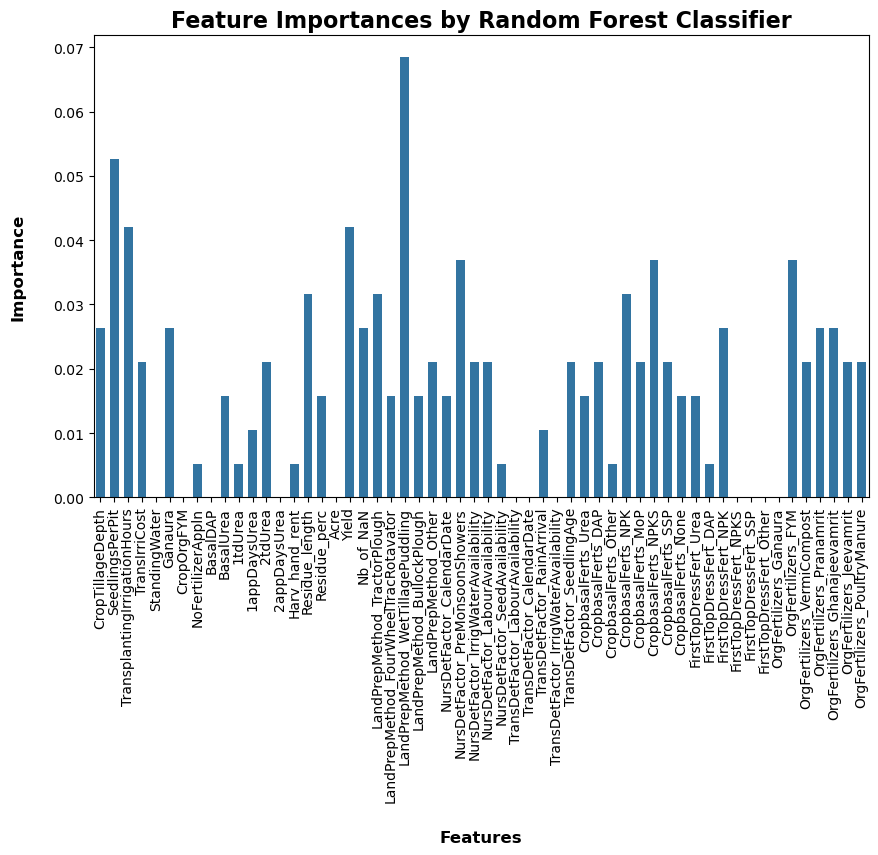

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

# create the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.index, y=feature_importances[0], gap=0.2)

# add labels and title
plt.xlabel("Features", labelpad=20, weight='bold', size=12)
plt.ylabel("Importance", labelpad=20, weight='bold', size=12)
plt.title("Feature Importances by Random Forest Classifier", weight='bold', size=16)

# rotate x-axis labels
plt.xticks(rotation=90)

# show the plot
plt.show()

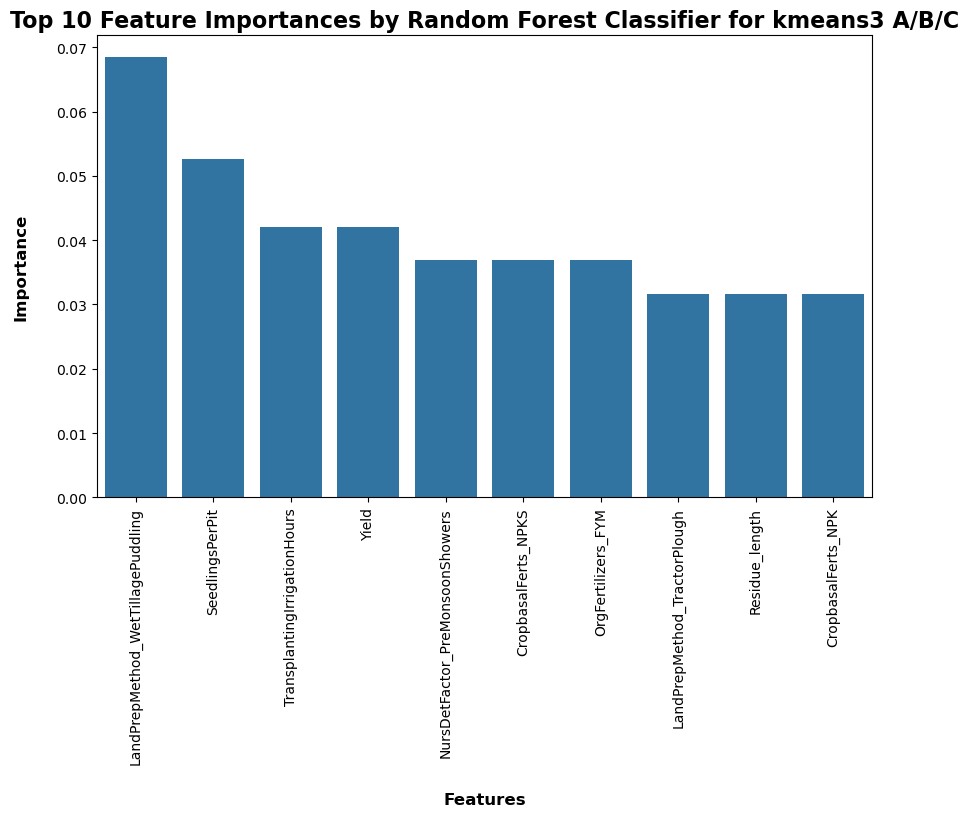

In [188]:
# sort the feature_importances dataframe by importance score
sorted_importances = feature_importances.sort_values(by=0, ascending=False)

# select the top 10 features
top_10 = sorted_importances[:10]

# create the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=top_10.index, y=top_10[0])

# add labels and title
plt.xlabel("Features", labelpad=20, weight='bold', size=12)
plt.ylabel("Importance", labelpad=20, weight='bold', size=12)
plt.title("Top 10 Feature Importances by Random Forest Classifier for kmeans3 A/B/C", weight='bold', size=16)

# rotate x-axis labels
plt.xticks(rotation=90)

# show the plot
plt.show()


#### Analysis

Although by not a lot we can see that WetTillagePuddling has a much higher importance than the lowest 5th most important feature when it comes to seperating the clusters. We could potentially explain this as the farmers who are more likely to use WetTillagePuddling might be more likely to be in the cluster with the highest yield (Hypothesis). This is because WetTillagePuddling is a method of preparing the soil for planting rice. It involves flooding the field with water and then plowing the soil. This is a very labour intensive process and requires a lot of water. This means that farmers who are more likely to use this method are more likely to have the manual resources to do so. 

Not neccesarily the better machinery to do so.

The two code blocks below will test this hypothesis

In [183]:
# Now i want to determine the cluster with the highest yield
# Again using k3label

# group the dataframe by k3label and calculate the mean yield for each group
yield_by_k3label = df.groupby('k3label')['Yield_per_Acre'].mean()

# get the k3label with the highest mean yield
k3label_with_highest_yield = yield_by_k3label.idxmax()

print("The k3label with the highest mean yield is:", k3label_with_highest_yield)

The k3label with the highest mean yield is: B


In [187]:
yield_by_k3label

k3label
A    1943.383560
B    2135.675323
C    1652.861639
Name: Yield_per_Acre, dtype: float64

In [185]:
# group the dataframe by k3label and calculate the count of WetTillagePuddling for each group
wet_tillage_by_k3label = df.groupby('k3label')['LandPrepMethod_WetTillagePuddling'].sum()

# get the k3label with the highest count of WetTillagePuddling
k3label_with_most_wet_tillage = wet_tillage_by_k3label.idxmax()

print("The k3label with the most farmers using WetTillagePuddling is:", k3label_with_most_wet_tillage)


The k3label with the most farmers using WetTillagePuddling is: A


In [186]:
wet_tillage_by_k3label

k3label
A    1541
B     375
C       0
Name: LandPrepMethod_WetTillagePuddling, dtype: int64

The code blocks above disprove the hypothesis, so perhaps WetTillagePuddling is an important feature for seperating clusters is for the processes that then follow it?


I am also going to assume that the bar plots that are similar levels are due to the data being more or less similar in A B C. 
We already see that yeild levels are not insanely far off from each other in the clusters and if this is same for some of the others then it would make sense that the features that are important for seperating the clusters would be similar in importance.




In [190]:
seedlings_per_pit_by_k3label = df.groupby('k3label')['SeedlingsPerPit'].mean()

k3label_with_highest_seedlings_per_pit = seedlings_per_pit_by_k3label.idxmax()

print("The k3label with the highest mean seedlings per pit is:", k3label_with_highest_seedlings_per_pit)
print("Raw differences in seedlings per pit in each cluster:", seedlings_per_pit_by_k3label) 

The k3label with the highest mean seedlings per pit is: B
Raw differences in seedlings per pit in each cluster: k3label
A    1.937216
B    4.546000
C    3.995968
Name: SeedlingsPerPit, dtype: float64


In [192]:
Crop_basal_Ferts_NPKS_by_k3label = df.groupby('k3label')['CropbasalFerts_NPKS'].mean()

k3label_with_highest_Crop_basal_Ferts_NPKS = Crop_basal_Ferts_NPKS_by_k3label.idxmax()

print("The k3label with the highest mean Crop_basal_Ferts_NPKS is:", k3label_with_highest_Crop_basal_Ferts_NPKS)
print("Raw differences in Crop_basal_Ferts_NPKS in each cluster:", Crop_basal_Ferts_NPKS_by_k3label)

The k3label with the highest mean Crop_basal_Ferts_NPKS is: A
Raw differences in Crop_basal_Ferts_NPKS in each cluster: k3label
A    0.014589
B    0.000996
C    0.000000
Name: CropbasalFerts_NPKS, dtype: float64


In [193]:
OrgFertilizers_FYM_by_k3label = df.groupby('k3label')['OrgFertilizers_FYM'].mean() 

k3label_with_highest_OrgFertilizers_FYM = OrgFertilizers_FYM_by_k3label.idxmax()

print("The k3label with the highest mean OrgFertilizers_FYM is:", k3label_with_highest_OrgFertilizers_FYM)
print("Raw differences in OrgFertilizers_FYM in each cluster:", OrgFertilizers_FYM_by_k3label)


The k3label with the highest mean OrgFertilizers_FYM is: A
Raw differences in OrgFertilizers_FYM in each cluster: k3label
A    0.394676
B    0.076693
C    0.004016
Name: OrgFertilizers_FYM, dtype: float64


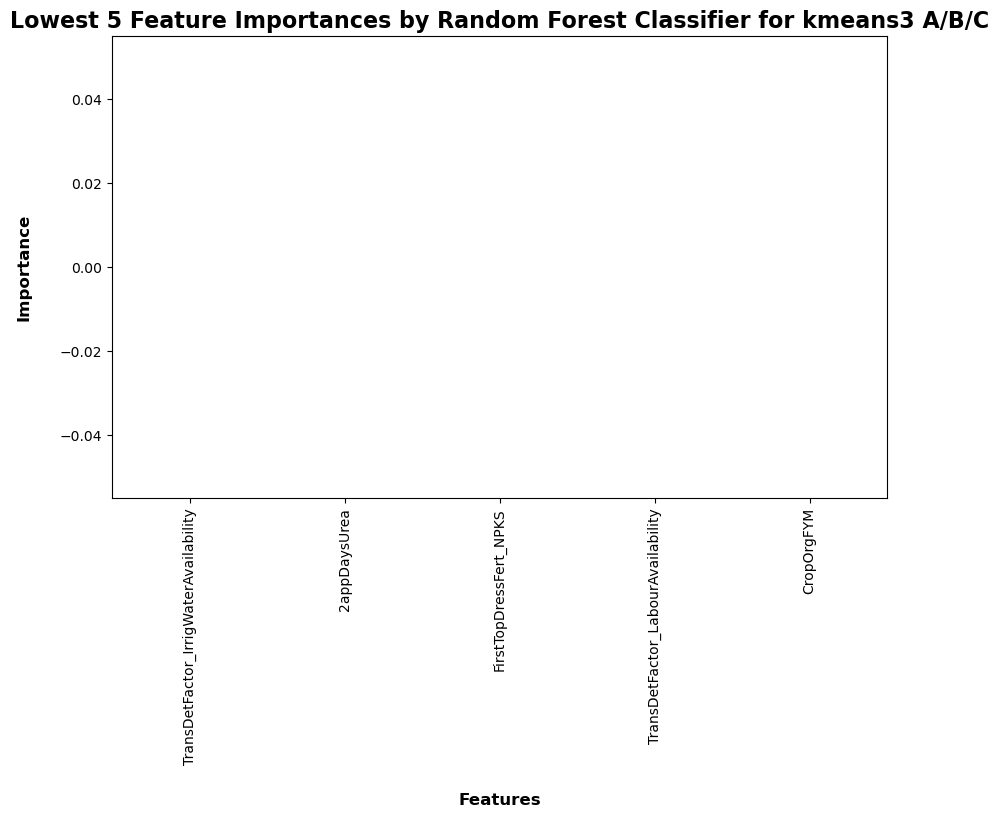

In [206]:
# sort the feature_importances dataframe by importance score
sorted_importances = feature_importances.sort_values(by=0, ascending=True)

# select the lowest 5 features
lowest_5 = sorted_importances[:5]

# create the bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=lowest_5.index, y=lowest_5[0])

# add labels and title
plt.xlabel("Features", labelpad=20, weight='bold', size=12)
plt.ylabel("Importance", labelpad=20, weight='bold', size=12)
plt.title("Lowest 5 Feature Importances by Random Forest Classifier for kmeans3 A/B/C", weight='bold', size=16)

# rotate x-axis labels
plt.xticks(rotation=90)

# show the plot
plt.show()


## Random Other Stuff Shaw is doing

In [177]:
df_dict = dict(tuple(df_no_id.groupby('k3label')))
df_A = df_dict['A']
df_B = df_dict['B']
df_C = df_dict['C']


In [178]:
df_A.head()


,District,Block,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,TransIrriCost_per_Acre,StandingWater,Ganaura,Ganaura_per_Acre,CropOrgFYM,CropOrgFYM_per_Acre,PCropSolidOrgFertAppMethod,NoFertilizerAppln,BasalDAP,BasalDAP_per_Acre,BasalUrea,BasalUrea_per_Acre,MineralFertAppMethod,1tdUrea,1tdUrea_per_Acre,1appDaysUrea,2tdUrea,2tdUrea_per_Acre,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Harv_hand_rent_per_Acre,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield,Yield_per_Acre,LandPrepMethod_TractorPlough,LandPrepMethod_FourWheelTracRotavator,LandPrepMethod_WetTillagePuddling,LandPrepMethod_BullockPlough,LandPrepMethod_Other,NursDetFactor_CalendarDate,NursDetFactor_PreMonsoonShowers,NursDetFactor_IrrigWaterAvailability,NursDetFactor_LabourAvailability,NursDetFactor_SeedAvailability,TransDetFactor_LabourAvailability,TransDetFactor_CalendarDate,TransDetFactor_RainArrival,TransDetFactor_IrrigWaterAvailability,TransDetFactor_SeedlingAge,CropbasalFerts_Urea,CropbasalFerts_DAP,CropbasalFerts_Other,CropbasalFerts_NPK,CropbasalFerts_MoP,CropbasalFerts_NPKS,CropbasalFerts_SSP,CropbasalFerts_None,FirstTopDressFert_Urea,FirstTopDressFert_DAP,FirstTopDressFert_NPK,FirstTopDressFert_NPKS,FirstTopDressFert_SSP,FirstTopDressFert_Other,OrgFertilizers_Ganaura,OrgFertilizers_FYM,OrgFertilizers_VermiCompost,OrgFertilizers_Pranamrit,OrgFertilizers_Ghanajeevamrit,OrgFertilizers_Jeevamrit,OrgFertilizers_PoultryManure,Nb_of_NaN,k2label,k3label,k4label,k5label
0,Nalanda,Noorsarai,2022-07-20,5,Manual_PuddledRandom,2022-06-27,2022-07-21,2.0,5.0,Boring,Electric,200.0,640.0,2.0,0.0,NaN,0.0,NaN,NaN,2,0.0,NaN,20.0,64.0,Broadcasting,15.0,48.00,18.0,0.0,NaN,NaN,Broadcasting,machine,2022-11-16,0.0,NaN,2022-11-16,machine,30,40,plowed_in_soil,0.312500,600.0,1920.000000,1,1,0,0,0,1,0,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,7,A,A,A,B
1,Nalanda,Rajgir,2022-07-18,5,Manual_PuddledRandom,2022-06-20,2022-07-20,2.0,5.0,Boring,Electric,125.0,400.0,3.0,0.0,NaN,0.0,NaN,NaN,2,15.0,48.0,10.0,32.0,Broadcasting,20.0,64.00,39.0,0.0,NaN,NaN,Broadcasting,hand,2022-11-25,3.0,9.6,2022-12-24,machine,24,10,plowed_in_soil,0.312500,600.0,1920.000000,1,1,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5,A,A,A,B
2,Gaya,Gurua,2022-06-30,6,Manual_PuddledRandom,2022-06-20,2022-08-13,2.0,4.0,Boring,Electric,80.0,540.0,2.0,1.0,6.75,1.0,6.75,SoilApplied,2,4.0,27.0,0.0,NaN,SoilApplied,5.0,33.75,65.0,0.0,NaN,NaN,RootApplication,hand,2022-12-12,480.0,3240.0,2023-01-11,machine,30,10,plowed_in_soil,0.148148,225.0,1518.750000,1,1,0,0,0,0,1,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,3,A,A,A,A
3,Gaya,Gurua,2022-06-16,6,Manual_PuddledRandom,2022-06-17,2022-07-17,2.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.50,0.0,NaN,SoilApplied,2,6.0,27.0,3.0,13.5,Broadcasting,5.0,22.50,5.0,0.0,NaN,NaN,Broadcasting,hand,2022-12-02,240.0,1080.0,2022-12-29,hand,26,10,plowed_in_soil,0.222222,468.0,2106.000000,1,1,0,0,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,9,A,A,A,A
4,Nalanda,Noorsarai,2022-07-19,4,Manual_PuddledRandom,2022-06-21,2022-07-20,2.0,9.0,Boring,Electric,300.0,640.0,2.0,0.0,NaN,0.0,NaN,NaN,2,15.0,32.0,30.0,64.0,Broadcasting,30.0,64.00,26.0,0.0,NaN,NaN,Broadcasting,machine,2022-11-30,0.0,NaN,2022-12-02,machine,24,40,plowed_in_soil,0.468750,550.0,1173.333333,1,0,1,0,0,1,0,1,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,A,A,A,B


In [179]:
df_B.head()

,District,Block,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,TransIrriCost_per_Acre,StandingWater,Ganaura,Ganaura_per_Acre,CropOrgFYM,CropOrgFYM_per_Acre,PCropSolidOrgFertAppMethod,NoFertilizerAppln,BasalDAP,BasalDAP_per_Acre,BasalUrea,BasalUrea_per_Acre,MineralFertAppMethod,1tdUrea,1tdUrea_per_Acre,1appDaysUrea,2tdUrea,2tdUrea_per_Acre,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Harv_hand_rent_per_Acre,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield,Yield_per_Acre,LandPrepMethod_TractorPlough,LandPrepMethod_FourWheelTracRotavator,LandPrepMethod_WetTillagePuddling,LandPrepMethod_BullockPlough,LandPrepMethod_Other,NursDetFactor_CalendarDate,NursDetFactor_PreMonsoonShowers,NursDetFactor_IrrigWaterAvailability,NursDetFactor_LabourAvailability,NursDetFactor_SeedAvailability,TransDetFactor_LabourAvailability,TransDetFactor_CalendarDate,TransDetFactor_RainArrival,TransDetFactor_IrrigWaterAvailability,TransDetFactor_SeedlingAge,CropbasalFerts_Urea,CropbasalFerts_DAP,CropbasalFerts_Other,CropbasalFerts_NPK,CropbasalFerts_MoP,CropbasalFerts_NPKS,CropbasalFerts_SSP,CropbasalFerts_None,FirstTopDressFert_Urea,FirstTopDressFert_DAP,FirstTopDressFert_NPK,FirstTopDressFert_NPKS,FirstTopDressFert_SSP,FirstTopDressFert_Other,OrgFertilizers_Ganaura,OrgFertilizers_FYM,OrgFertilizers_VermiCompost,OrgFertilizers_Pranamrit,OrgFertilizers_Ghanajeevamrit,OrgFertilizers_Jeevamrit,OrgFertilizers_PoultryManure,Nb_of_NaN,k2label,k3label,k4label,k5label
21,Nalanda,Noorsarai,2022-07-16,5,Manual_PuddledRandom,2022-06-18,2022-07-17,1.0,6.0,Boring,Electric,120.0,320.0,3.0,0.0,NaN,0.0,NaN,NaN,1,0.0,NaN,25.0,66.666667,Broadcasting,0.0,NaN,NaN,0.0,NaN,NaN,NaN,hand,2022-10-20,1200.0,3200.0,2022-11-02,machine,25,10,plowed_in_soil,0.375000,720.0,1920.0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,A,B,B,B
27,Jamui,Jamui,2022-06-25,4,Manual_PuddledRandom,2022-06-29,2022-08-14,3.0,4.0,Boring,Electric,400.0,2200.0,1.0,3.0,16.5,0.0,NaN,Broadcasting,2,15.0,82.5,15.0,82.500000,Broadcasting,10.0,55.0,10.0,0.0,NaN,NaN,Broadcasting,hand,2022-11-11,200.0,1100.0,2023-01-23,machine,26,10,plowed_in_soil,0.181818,320.0,1760.0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,3,A,B,B,C
28,Jamui,Jamui,2022-07-08,4,Manual_PuddledRandom,2022-07-06,2022-07-26,3.0,4.0,Boring,Electric,400.0,1760.0,1.0,4.0,17.6,0.0,NaN,Broadcasting,2,10.0,44.0,10.0,44.000000,Broadcasting,5.0,22.0,5.0,0.0,NaN,NaN,Broadcasting,hand,2022-11-09,300.0,1320.0,2023-01-23,machine,26,10,plowed_in_soil,0.227273,4000.0,17600.0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,3,A,B,B,C
30,Jamui,Khaira,2022-07-26,3,Manual_PuddledRandom,2022-06-27,2022-07-27,3.0,2.0,Boring,Electric,NaN,NaN,11.0,0.0,NaN,0.0,NaN,NaN,1,8.0,35.2,11.0,48.400000,Broadcasting,0.0,NaN,NaN,0.0,NaN,NaN,NaN,hand,2022-11-11,100.0,440.0,2023-01-03,machine,28,10,plowed_in_soil,0.227273,400.0,1760.0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,A,B,B,B
39,Jamui,Jamui,2022-07-01,3,Manual_PuddledRandom,2022-07-08,2022-08-25,3.0,4.0,Boring,Electric,300.0,1320.0,2.0,4.0,17.6,0.0,NaN,Broadcasting,2,15.0,66.0,15.0,66.000000,Broadcasting,10.0,44.0,5.0,0.0,NaN,NaN,Broadcasting,hand,2022-11-17,250.0,1100.0,2023-01-19,machine,26,10,plowed_in_soil,0.227273,400.0,1760.0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,3,A,B,B,C


In [180]:
df_C.head()

,District,Block,CropTillageDate,CropTillageDepth,CropEstMethod,RcNursEstDate,SeedingSowingTransplanting,SeedlingsPerPit,TransplantingIrrigationHours,TransplantingIrrigationSource,TransplantingIrrigationPowerSource,TransIrriCost,TransIrriCost_per_Acre,StandingWater,Ganaura,Ganaura_per_Acre,CropOrgFYM,CropOrgFYM_per_Acre,PCropSolidOrgFertAppMethod,NoFertilizerAppln,BasalDAP,BasalDAP_per_Acre,BasalUrea,BasalUrea_per_Acre,MineralFertAppMethod,1tdUrea,1tdUrea_per_Acre,1appDaysUrea,2tdUrea,2tdUrea_per_Acre,2appDaysUrea,MineralFertAppMethod.1,Harv_method,Harv_date,Harv_hand_rent,Harv_hand_rent_per_Acre,Threshing_date,Threshing_method,Residue_length,Residue_perc,Stubble_use,Acre,Yield,Yield_per_Acre,LandPrepMethod_TractorPlough,LandPrepMethod_FourWheelTracRotavator,LandPrepMethod_WetTillagePuddling,LandPrepMethod_BullockPlough,LandPrepMethod_Other,NursDetFactor_CalendarDate,NursDetFactor_PreMonsoonShowers,NursDetFactor_IrrigWaterAvailability,NursDetFactor_LabourAvailability,NursDetFactor_SeedAvailability,TransDetFactor_LabourAvailability,TransDetFactor_CalendarDate,TransDetFactor_RainArrival,TransDetFactor_IrrigWaterAvailability,TransDetFactor_SeedlingAge,CropbasalFerts_Urea,CropbasalFerts_DAP,CropbasalFerts_Other,CropbasalFerts_NPK,CropbasalFerts_MoP,CropbasalFerts_NPKS,CropbasalFerts_SSP,CropbasalFerts_None,FirstTopDressFert_Urea,FirstTopDressFert_DAP,FirstTopDressFert_NPK,FirstTopDressFert_NPKS,FirstTopDressFert_SSP,FirstTopDressFert_Other,OrgFertilizers_Ganaura,OrgFertilizers_FYM,OrgFertilizers_VermiCompost,OrgFertilizers_Pranamrit,OrgFertilizers_Ghanajeevamrit,OrgFertilizers_Jeevamrit,OrgFertilizers_PoultryManure,Nb_of_NaN,k2label,k3label,k4label,k5label
13,Jamui,Jamui,2022-07-23,4,Manual_PuddledRandom,2022-06-19,2022-07-29,4.0,5.0,Boring,Electric,1000.0,2200.0,3.0,4.0,8.8,0.0,NaN,Broadcasting,3,0.0,NaN,0.0,NaN,Broadcasting,2.0,4.4,30.0,1.0,2.2,60.0,Broadcasting,hand,2022-11-30,90.0,198.0,2023-02-02,hand,29,10,plowed_in_soil,0.454545,800.0,1760.0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,3,B,C,C,D
14,Jamui,Jamui,2022-06-29,4,Manual_PuddledRandom,2022-06-21,2022-07-27,4.0,2.0,Boring,Electric,400.0,2200.0,3.0,2.0,11.0,0.0,NaN,Broadcasting,3,0.0,NaN,0.0,NaN,Broadcasting,2.0,11.0,30.0,1.0,5.5,60.0,Broadcasting,hand,2022-11-26,90.0,495.0,2023-01-27,hand,29,10,plowed_in_soil,0.181818,280.0,1540.0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,3,B,C,C,D
52,Jamui,Jamui,2022-07-25,4,Manual_PuddledRandom,2022-06-19,2022-08-01,4.0,5.0,Boring,Electric,1000.0,2200.0,3.0,5.0,11.0,0.0,NaN,Broadcasting,3,0.0,NaN,0.0,NaN,Broadcasting,2.0,4.4,30.0,1.0,2.2,60.0,Broadcasting,hand,2022-11-20,90.0,198.0,2023-02-02,hand,29,10,plowed_in_soil,0.454545,800.0,1760.0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,3,B,C,C,D
104,Jamui,Jamui,2022-07-27,4,Manual_PuddledRandom,2022-06-20,2022-07-31,4.0,2.0,Boring,Electric,500.0,2200.0,3.0,2.0,8.8,0.0,NaN,Broadcasting,2,0.0,NaN,0.0,NaN,Broadcasting,2.0,8.8,1.0,0.0,NaN,NaN,Broadcasting,hand,2022-11-24,90.0,396.0,2023-02-11,hand,30,10,plowed_in_soil,0.227273,400.0,1760.0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,5,B,C,C,D
146,Jamui,Jamui,2022-07-22,4,Manual_PuddledRandom,2022-06-20,2022-07-26,4.0,2.0,Boring,Electric,500.0,2200.0,3.0,3.0,13.2,0.0,NaN,Broadcasting,3,0.0,NaN,0.0,NaN,Broadcasting,2.0,8.8,30.0,1.0,4.4,60.0,Broadcasting,hand,2022-11-25,90.0,396.0,2023-01-26,hand,29,10,plowed_in_soil,0.227273,390.0,1716.0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,3,B,C,C,D


#### What are the factors that I think will be important in determining the clusters?



##### Fertilisers?

I will first start with the 7 types of fertilisers we have available:

1. "Urea" - Very common for rice and wheat it would seem from various papers due to its high nitrogen content
2. "DAP" (Diammonium Phosphate)
3. "Other" (? - Mixtuer of fertilisers or some unknown fertiliser)
4. "NPK" - Very common for rice - Usual applications come in steps meaning if this appears again for most columns its probably just indicative of rice farming
5. "MoP" - Potash fertiliser - potassium chloride - Common for Maize and a few other crops - Ideally for diesease resistance in all crops - Very cheap relatively which would explain why Bahir would use it
6. "NPKS" - Nitrogen, Phosphorus, Potassium and Sulphur - Common for wheat and rice - Also very suitable for humid climates again explaining why Bahir would use it
7. "SSP" - Single Super Phosphate - Phosphorus, Sulphur and Calcium + micro - nutrients [Phosphorus, gives best results in neutral soils. But in case of alkaline, excessive presence of calcium makes complexes with phosphorus and ultimately results in poor phosphorus recovery. So bringing soil reaction to neutral by adding gypsum and leaching can only improve P use efficiency of SSP. ](https://kribhco.net/ssp.html#:~:text=SSP%20is%20the%20most%20popular,Description%20Properties%20Efficient%20Use)
8. "None" (Technically not a fertiliser) 